In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestRegressor
#we are doing random forest regressor thats why we are taking average of multiple models(ensemble model)
#random forest consist of multiple descision trees(each tree will give prediction)
#random forest in nothing ensemble of descision tree classifier
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df_raw = pd.read_csv("modified_credit_card.csv")
df_raw.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
#scoring function we use rmse
def score(y_actual, y_preds):
    return sqrt(mean_squared_error(y_actual, y_preds))

In [5]:
#extract target variable from train dataset
y = df_raw['default payment next month']
X = df_raw.drop('default payment next month', axis=1)

In [6]:
X.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [7]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, shuffle=True)

In [8]:
model3 = RandomForestRegressor(n_estimators=1000, max_features=1, bootstrap=True, max_depth=100, min_samples_leaf=10, random_state=42)


In [9]:
model3.fit(X_train, y_train)

RandomForestRegressor(max_depth=100, max_features=1, min_samples_leaf=10,
                      n_estimators=1000, random_state=42)

In [10]:
score(y_train, model3.predict(X_train))
#model3 is used to predict on the dataset and compare it with actual y
#training error is less than the validation error which means training score is less than validation score
#which means model is performing better on training data 

0.3449882385293425

In [11]:
score(y_valid, model3.predict(X_valid))

0.37198436614944536

In [12]:
print("Train score: ", score(y_train, model3.predict(X_train)))
print("Validation score: ", score(y_valid, model3.predict(X_valid)))

Train score:  0.3449882385293425
Validation score:  0.37198436614944536


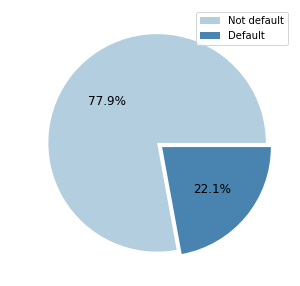

In [13]:
plt.figure(figsize=(5,5))

df_raw['default payment next month'].value_counts().plot(kind='pie', labels=['',''], 
                                        autopct='%1.1f%%', colors=['#B3CEDE','#4884AF'], 
                                        explode=[0,0.06], textprops={"fontsize":12})

plt.ylabel(' ')
plt.legend(labels=['Not default','Default'])
plt.show()

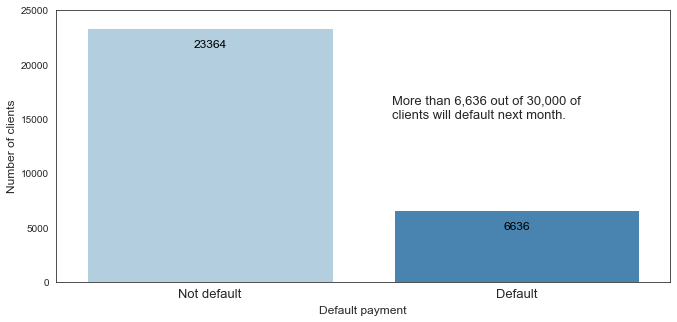

In [14]:
plt.figure(figsize=(11,5))
sns.set_style('white')
ax = sns.countplot(data=df_raw, x='default payment next month', palette='Blues')

ax.set_xlabel('Default payment', fontsize=12)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=12)

plt.ylim(0,25000)
plt.annotate('More than 6,636 out of 30,000 of \nclients will default next month.', xy=(0.595, 15000), fontsize=13)
plt.xticks([0,1],['Not default', 'Default'], fontsize=13); plt.ylabel('Number of clients', fontsize=12)
plt.show()

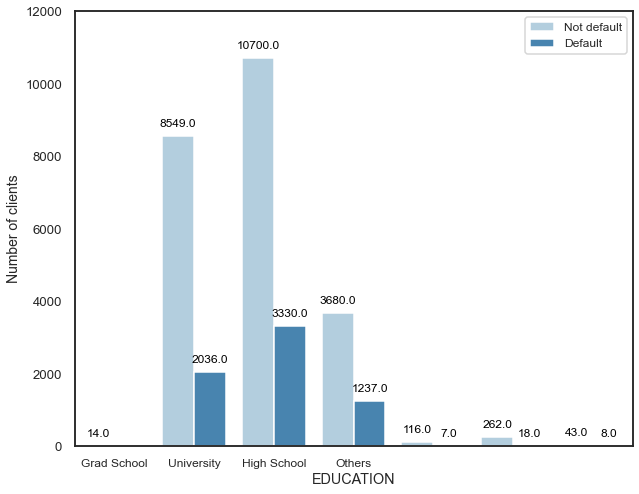

In [15]:
plt.figure(figsize=(10,8))
sns.set_context('talk', font_scale=0.8)

ax = sns.countplot(data=df_raw, x='EDUCATION', hue='default payment next month', palette='Blues')
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+800), ha='center', va='top', color='black', size=12)

plt.ylim(0,12000)
plt.xticks([0,1,2,3], ['Grad School', 'University', 'High School', 'Others'], fontsize=12);plt.ylabel('Number of clients', fontsize = 14)
plt.legend(labels=['Not default', 'Default'], fontsize=12)
plt.show()


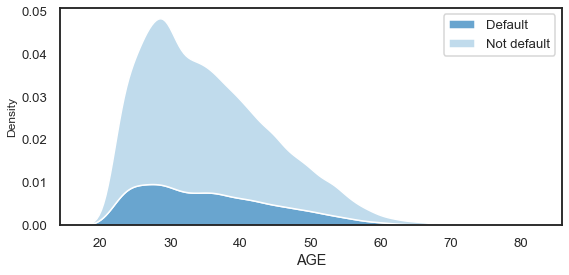

In [16]:
plt.figure(figsize=(9,4))
sns.kdeplot(data=df_raw, x='AGE', hue='default payment next month', multiple='stack', palette='Blues')

plt.legend(loc='upper right', labels=['Default', 'Not default'])
plt.ylabel('Density', fontsize= 12)
plt.show()

# Vizualization bagging


In [17]:
preds = np.stack([t.predict(X_valid) for t in model3.estimators_])

E:\anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
E:\anaconda\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
E:\anaconda\lib\site-packages\skle

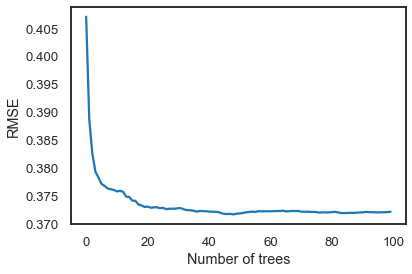

In [18]:
from matplotlib import pyplot as plt
plt.plot([sqrt(mean_squared_error(y_valid, np.mean(preds[:i+1], axis=0))) for i in range(100)])
plt.xlabel('Number of trees')
plt.ylabel('RMSE')
plt.show()

# Simple Linear Regression

In [19]:
preds.shape

(1000, 9000)

In [20]:
#trying to predict default payment using limit_bal
df_raw['LIMIT_BAL'].to_numpy()

array([ 20000, 120000,  90000, ...,  30000,  80000,  50000], dtype=int64)

In [21]:
X2 = df_raw['LIMIT_BAL'].to_numpy()
X2.shape

(30000,)

In [22]:
X2 = X2.reshape((-1, 1))
X2.shape

(30000, 1)

In [23]:
y2 = df_raw['default payment next month'].to_numpy()
y2.shape

(30000,)

In [24]:
y2 = y2.reshape((-1,1))
y2.shape

(30000, 1)

In [25]:
type(y2), type(X2)

(numpy.ndarray, numpy.ndarray)

In [26]:
#Train is generally 80 % of your dataset
#Test is generally 20 % of your dataset

In [27]:
# Split the data into training/testing sets

X2_train = X2[:15000]
X2_test = X2[15000:]

In [28]:
# Split the targets into training/testing sets

y2_train = y2[:15000]
y2_test = y2[15000:]

In [29]:
X2_train.shape, y2_train.shape

((15000, 1), (15000, 1))

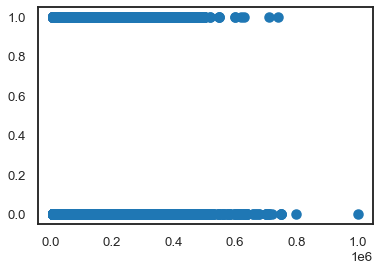

In [30]:
plt.scatter(X2_train, y2_train,);

plt.show()

In [31]:
X2_test.shape, y2_train.shape

((15000, 1), (15000, 1))

In [32]:
# Create linear regression object

regr = linear_model.LinearRegression()

In [33]:
regr.fit(X2_train, y2_train)

LinearRegression()

In [34]:
y2_pred = regr.predict(X2_train)


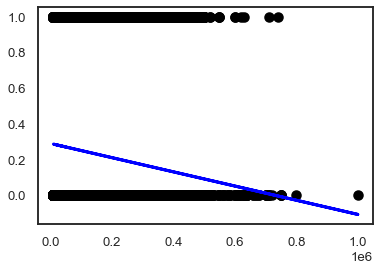

In [35]:
#plotting for train dataset
plt.scatter(X2_train, y2_train,  color='black')
plt.plot(X2_train, y2_pred, color='blue', linewidth=3)

plt.show()

In [36]:
y2_pred = regr.predict(X2_test)

In [37]:
# The coefficients

print('Coefficients: \n', regr.coef_)

# The intercept
print('Intercept: \n', regr.intercept_)

# The mean squared error

print('Mean squared error: %.2f'
      % mean_squared_error(y2_test, y2_pred))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f'
      % r2_score(y2_test, y2_pred))

Coefficients: 
 [[-3.97249218e-07]]
Intercept: 
 [0.29116764]
Mean squared error: 0.16
Coefficient of determination: 0.03


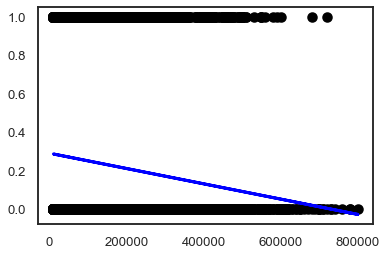

In [38]:
#plotting for test dataset
plt.scatter(X2_test, y2_test,  color='black')
plt.plot(X2_test, y2_pred, color='blue', linewidth=3)

plt.show()
